In [74]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from Kernel.SubsequenceStringKernel import SubsequenceStringKernel
import Util as Util
import importlib
importlib.reload(Util)
import numpy as np
from matplotlib import pyplot as plt 
import Constant as C
import MetricsUtil as metric
importlib.reload(metric)

<module 'MetricsUtil' from '/Users/pradeep/Files/ML/StringKernel/MetricsUtil.py'>

In [75]:
case_name="case2"

In [76]:
kernels=Util.get_kernels(case_name)
clfs = Util.get_models(case_name)
m_lambdas = C.m_lambdas

In [77]:
def get_decision_function(clf, k):
    y_ = []
    support_ = clf.support_
    dual_coef_ = clf.dual_coef_[0]
    intercept_ = clf.intercept_[0]
    for i in range(len(k)):
        svk = k[i][support_]
        y_.append(svk.dot(dual_coef_.T) + intercept_)
    return y_

In [78]:
def get_distance_decision_line(clf, k):
    first = np.sqrt((clf.dual_coef_[0]*clf.dual_coef_[0]).sum()+clf.intercept_[0]**2)
    second = np.sqrt(clf.n_support_.sum()+1)
    d_f = get_decision_function(clf, k)
    return np.divide(d_f,first*second), d_f
#     return np.divide(get_decision_function(clf, k), np.sqrt((clf.dual_coef_[0]*clf.dual_coef_[0]).sum()+clf.intercept_[0]^2)*    return np.divide(get_decision_function(clf, k), np.sqrt((clf.dual_coef_[0]*clf.dual_coef_[0]).sum()+clf.intercept_[0]^2)*np.sqrt(clf.n_support_.sum()+1))

In [79]:
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [80]:
def get_value( y, distance):
    tp = 0
    fn = 0
    fp = 0
    for i,d in enumerate(distance):  
        if d > 0 and y[i] > 0:
            tp+=d
        elif (d > 0 and y[i] < 0):
            fp+=d
        elif d < 0 and y[i] > 0:
            fn+=d
    return (2*tp)/(2*tp+ fp-fn)

def get_value2( y, distance):
    tp = 0
    fn = 0
    fp = 0
    for i,d in enumerate(distance):  
        if d > 0 and y[i] > 0:
            tp+=1
        elif (d > 0 and y[i] < 0):
            fp+=1
        elif d < 0 and y[i] > 0:
            fn+=1
    return (2*tp)/(2*tp+ fp+fn)

def get_value1( y, distance):
    tp = 0
    fn = 0
    fp = 0
    for i,d in enumerate(distance):  
        if d < 0 and y[i] < 0:
            tp+=-d
        elif (d < 0 and y[i] > 0):
            fp+=-d
        elif d > 0 and y[i] > 0:
            fn+=d
    return (2*tp)/(2*tp+ fp+fn)

In [81]:
def get_distance_graph():
    for i,m_lambda in enumerate(m_lambdas):
        distance= clfs[i].decision_function(kernels[i]) 
        x,y = Util.get_data(case_name, "test")
        f1_1,f1_2 = metric.get_distance_f1_Score(y,clfs[i],kernels[i])
        print(f1_1,f1_2)
        y_predict = clfs[i].predict(kernels[i]) 
        f1_1 = get_value(y,distance)
        f1_2 = get_value1(y,distance)
        plt.scatter([m_lambda for _ in range(len(distance))],distance,c=(y==y_predict))
        
    plt.show()

0.9691294005986179 0.9747972954958474


<IPython.core.display.Javascript object>


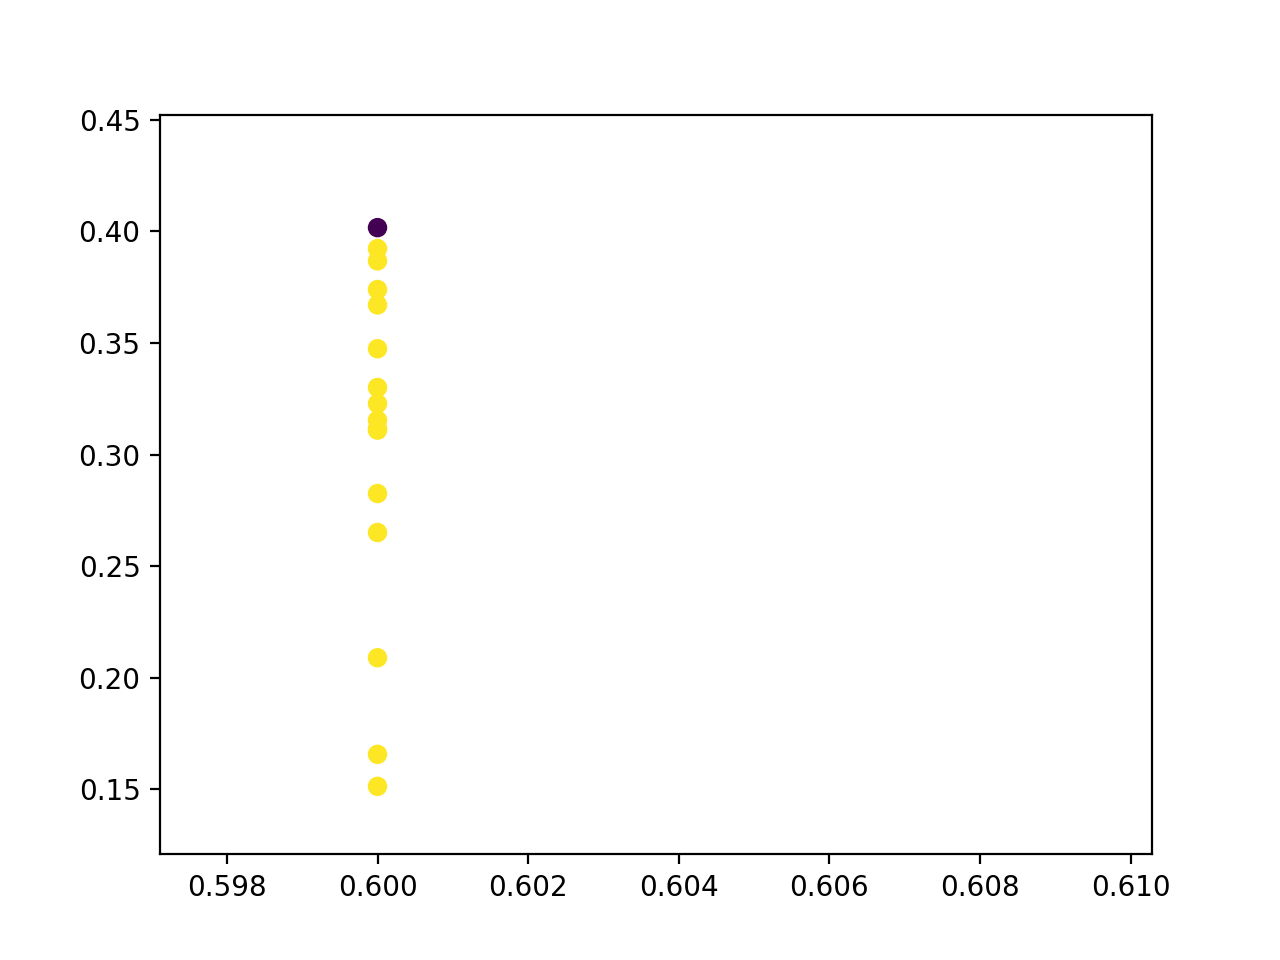

0.9695760440590409 0.9753067699172446
0.9703873427523189 0.9762231611597437
0.9717741814666437 0.9778566418043458
0.9741623808845659 0.9805857155635221
0.9743679656565981 0.9818465552023999
0.9743531739149036 0.98263407934791
0.9731038585105006 0.9821469959185088
0.9628751545948536 0.9751074193515425


In [82]:
get_distance_graph()